<a href="https://colab.research.google.com/github/saurabhsingh1411/10_simple_project_data_science/blob/main/Stock%20Price%20Indicator/Stock_Price_Indicator_final%5BTata_Global%5D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt



In [28]:
stock=pd.read_csv('NSE-TATAGLOBAL11.csv')
stock.head()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2018-10-08,208.00,222.25,206.85,216.00,215.15,4642146.0,10062.83
1,2018-10-05,217.00,218.60,205.90,210.25,209.20,3519515.0,7407.06
2,2018-10-04,223.50,227.80,216.15,217.25,218.20,1728786.0,3815.79
3,2018-10-03,230.00,237.50,225.75,226.45,227.60,1708590.0,3960.27
4,2018-10-01,234.55,234.60,221.05,230.30,230.90,1534749.0,3486.05


In [29]:
corr=stock.corr()
corr

,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
Open,1.000000,0.998956,0.998776,0.997662,0.997704,0.367503,0.587026
High,0.998956,1.000000,0.998728,0.999130,0.999159,0.388798,0.605907
Low,0.998776,0.998728,1.000000,0.999008,0.999065,0.361695,0.582446
Last,0.997662,0.999130,0.999008,1.000000,0.999963,0.381269,0.599575
Close,0.997704,0.999159,0.999065,0.999963,1.000000,0.380801,0.599155
Total Trade Quantity,0.367503,0.388798,0.361695,0.381269,0.380801,1.000000,0.941976
Turnover (Lacs),0.587026,0.605907,0.582446,0.599575,0.599155,0.941976,1.000000


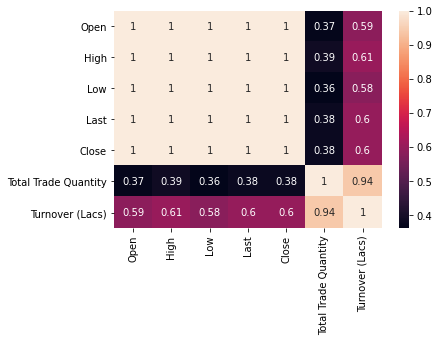

In [30]:
import seaborn as sns
sns.heatmap(corr,annot=True)

In [32]:
stock.isnull().sum()

Date                    0
Open                    0
High                    0
Low                     0
Last                    0
Close                   0
Total Trade Quantity    0
Turnover (Lacs)         0
dtype: int64

In [33]:
features=['High','Low','Last','Close','Total Trade Quantity','Turnover (Lacs)']
X=stock[features]
y=stock['Open']

In [34]:
print(X.head(3))
print(y.head(3))

     High     Low    Last   Close  Total Trade Quantity  Turnover (Lacs)
0  222.25  206.85  216.00  215.15             4642146.0         10062.83
1  218.60  205.90  210.25  209.20             3519515.0          7407.06
2  227.80  216.15  217.25  218.20             1728786.0          3815.79
0    208.0
1    217.0
2    223.5
Name: Open, dtype: float64


In [35]:
X.shape

(1235, 6)

In [36]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [37]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()

lr.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [38]:
y_pred=lr.predict(X_test)

In [39]:
lr.score(X_test,y_pred)

1.0

In [40]:
from sklearn.metrics import mean_squared_error

rms = mean_squared_error(y_test, y_pred, squared=False)
rms

1.4123822262808345

In [41]:
print(y_test[0:5])

1083    152.95
18      221.00
1099    156.50
818     132.95
184     314.65
Name: Open, dtype: float64


In [42]:
print(y_pred[0:5])

[152.08550043 221.26767579 155.7311964  133.23192171 314.35262099]


Catboost Model 

In [45]:
#!pip3 install catboost

     |████████████████████████████████| 65.8MB 60kB/s 


In [46]:
from catboost import CatBoostRegressor

In [54]:
model=CatBoostRegressor(iterations=500,learning_rate=0.1,depth=2)

In [55]:
model.fit(X_train,y_train)

0:	learn: 47.9188284	total: 608us	remaining: 304ms
1:	learn: 43.9573426	total: 1.49ms	remaining: 372ms
2:	learn: 40.4840888	total: 2.08ms	remaining: 345ms
3:	learn: 37.0399100	total: 2.72ms	remaining: 338ms
4:	learn: 34.0252825	total: 3.25ms	remaining: 322ms
5:	learn: 31.1551844	total: 3.86ms	remaining: 318ms
6:	learn: 28.6463338	total: 4.37ms	remaining: 308ms
7:	learn: 26.4229537	total: 4.9ms	remaining: 301ms
8:	learn: 24.3630879	total: 5.43ms	remaining: 296ms
9:	learn: 22.5569896	total: 5.95ms	remaining: 291ms
10:	learn: 20.8623070	total: 6.41ms	remaining: 285ms
11:	learn: 19.2340555	total: 6.9ms	remaining: 281ms
12:	learn: 17.8446608	total: 7.36ms	remaining: 276ms
13:	learn: 16.5133285	total: 7.85ms	remaining: 273ms
14:	learn: 15.3455410	total: 8.37ms	remaining: 271ms
15:	learn: 14.2650775	total: 8.87ms	remaining: 268ms
16:	learn: 13.2811715	total: 9.46ms	remaining: 269ms
17:	learn: 12.4073579	total: 9.98ms	remaining: 267ms
18:	learn: 11.6852607	total: 10.8ms	remaining: 273ms
19:	le

In [56]:
y_pred2=model.predict(X_test)

In [57]:
from sklearn.metrics import mean_squared_error

rms = mean_squared_error(y_test, y_pred2, squared=False)
rms

2.632600248779696

In [58]:
print(y_pred2[0:5])
print(y_test[0:5])

[153.12270085 222.2653907  153.43546428 134.97329181 315.27092931]
1083    152.95
18      221.00
1099    156.50
818     132.95
184     314.65
Name: Open, dtype: float64
